In [1]:
from pyspark import SparkContext, SparkConf

In [2]:
import datetime as datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [62]:
events = pd.read_csv('/home/nicolas/Descargas/spark-2.3.1-bin-hadoop2.7/events.csv')

In [113]:
events['timestamp'] =  pd.to_datetime(events['timestamp'])
events[['marca','modelo']] = events['model'].dropna().str.split(' ',n=1,expand=True)
events['weekday']=events['timestamp'].apply(lambda x: x.day_name())
events['hour']=events['timestamp'].dt.hour
events['month']=events['timestamp'].dt.month_name

# Estudiamos el contenido de los registros distribuidos a lo largo del tiempo:
### El rango temporal contenido en los registros ronda de: 2018-01-01 07:32:26 como fecha minima, y 2018-06-15 23:59:31 como fecha maxima.
### De aqui extraemos la siguiente informacion:

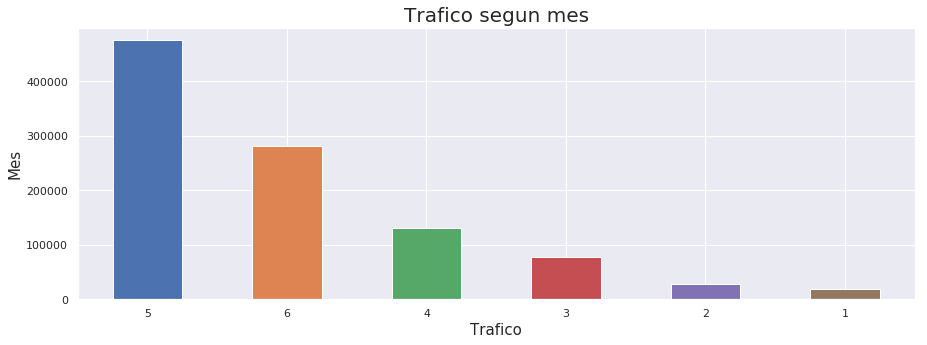

In [129]:
events['month'].value_counts().plot(kind='bar',rot=0, figsize=(15,5))
plt.title("Trafico segun mes", size=20)
plt.xlabel("Trafico",size=15)
plt.ylabel("Mes",size=15)
plt.show()

### Observamos que el volumen de trafico en la pagina web de Trocaphone pareciera ir incrementando con el tiempo. Tambien observamos que el mes con el mayor trafico resulta ser Mayo, pero teniendo en cuenta que se tienen datos hasta mitad de Junio, nos arriesgamos a suponer que de tener los datos del mes completo, se mantendria la tendencia de alza.

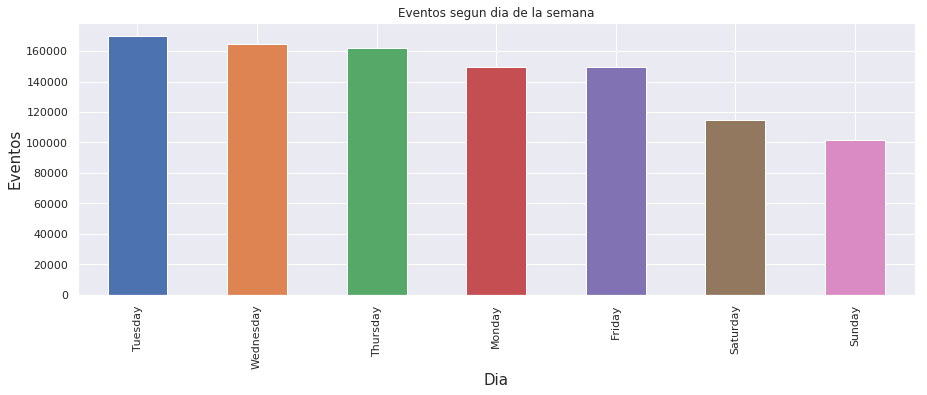

In [137]:
#Grafico Eventos segun dia de la semana
events.groupby('weekday')['event'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun dia de la semana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Dia", size=15)
plt.show()

### Observamos que la pagina posee un menor trafico durante los fines de semana

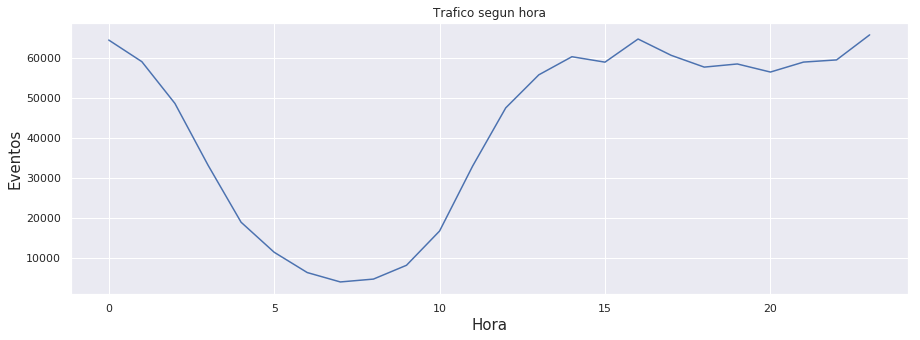

In [16]:
#Grafico Trafico Segun hora
events.groupby('hour')['hour'].count().plot(kind='line',figsize=(15,5))
plt.title('Trafico segun hora')
plt.ylabel("Eventos", size=15)
plt.xlabel("Hora", size=15)
plt.show()

### El analisis realizado cumple con lo esperado, que es un decremento en el trafico a partir de las 00:00 hs, y hasta las 07:00 hs, debido a que es el horario de descanso

# Procedemos a realizar el analisis de las compras segun las caracteristicas del producto

# Compras/Visualizaciones segun Memoria

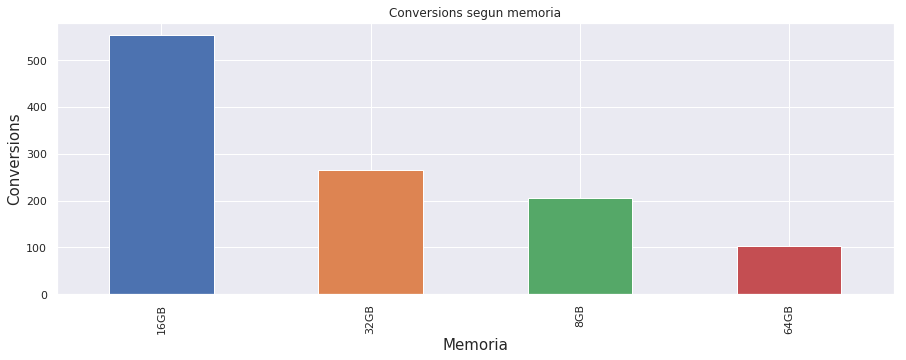

In [34]:
#GRAFICO MEMORIA SEGUN CONVERSION

events.loc[events['event']=='conversion']['storage'].value_counts().head(4).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun memoria')
plt.ylabel("Conversions", size=15)
plt.xlabel("Memoria", size=15)
plt.show()

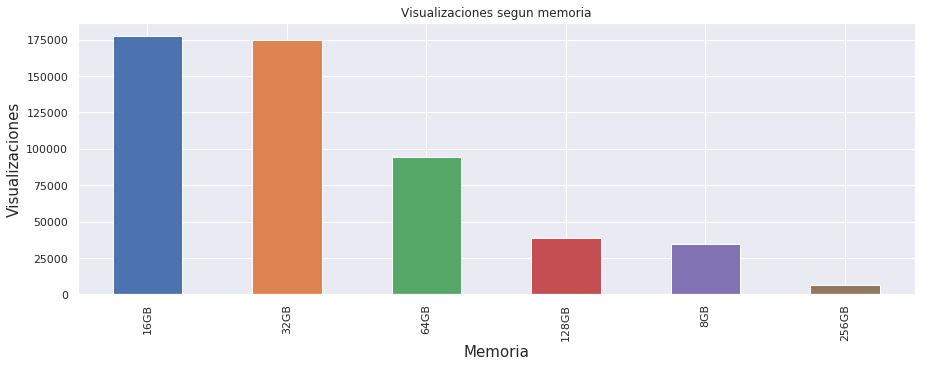

In [160]:
events.loc[events['event']=='viewed product']['storage'].value_counts().head(6).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun memoria')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Memoria", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Memoria

# Compras/Visualizaciones segun Color

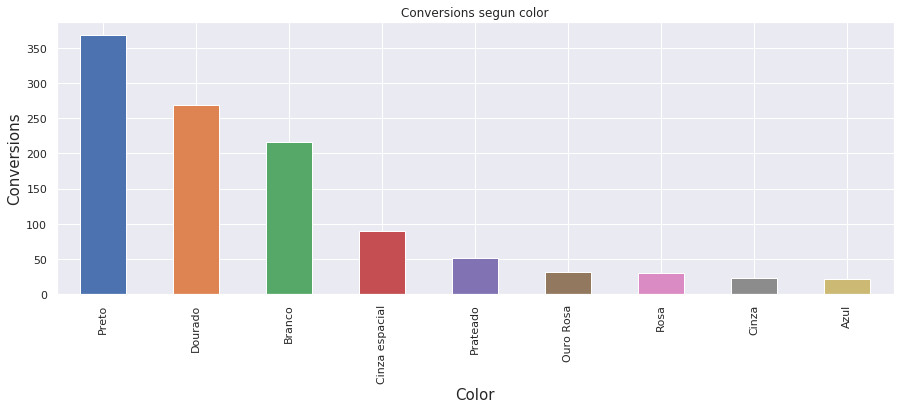

In [32]:
events.loc[events['event']=='conversion']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun color')
plt.ylabel("Conversions", size=15)
plt.xlabel("Color", size=15)
plt.show()

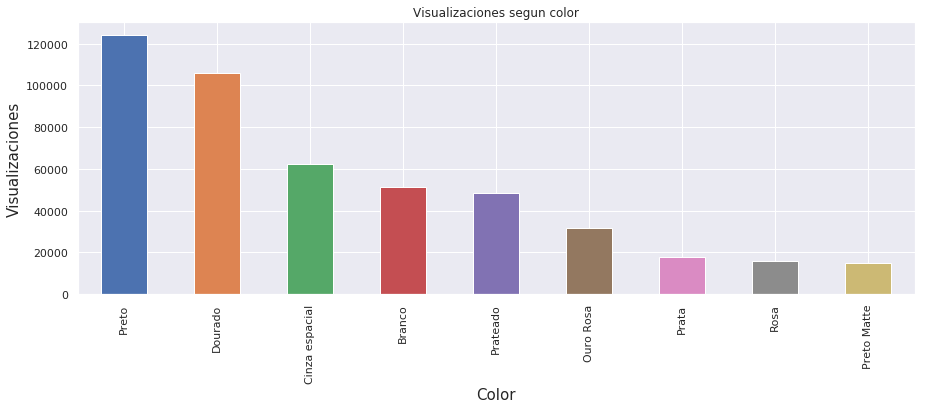

In [31]:
events.loc[events['event']=='viewed product']['color'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun color')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Color", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Color

# Compras/Visualizaciones segun Condicion

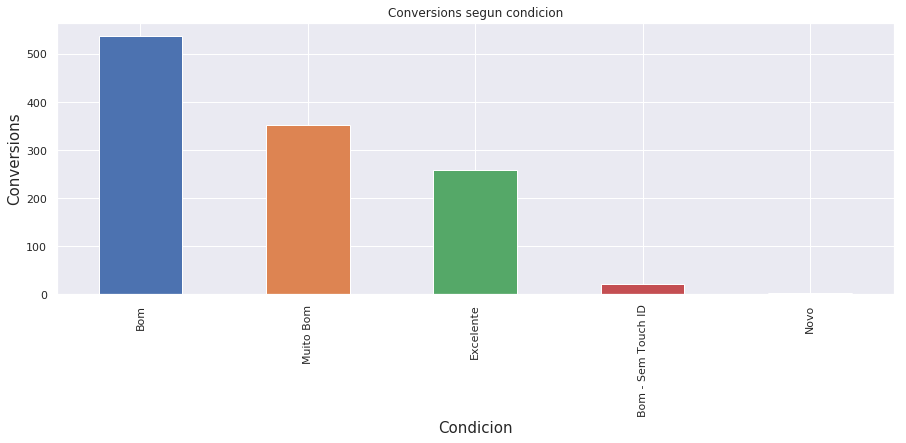

In [30]:
events.loc[events['event']=='conversion']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun condicion')
plt.ylabel("Conversions", size=15)
plt.xlabel("Condicion", size=15)
plt.show()

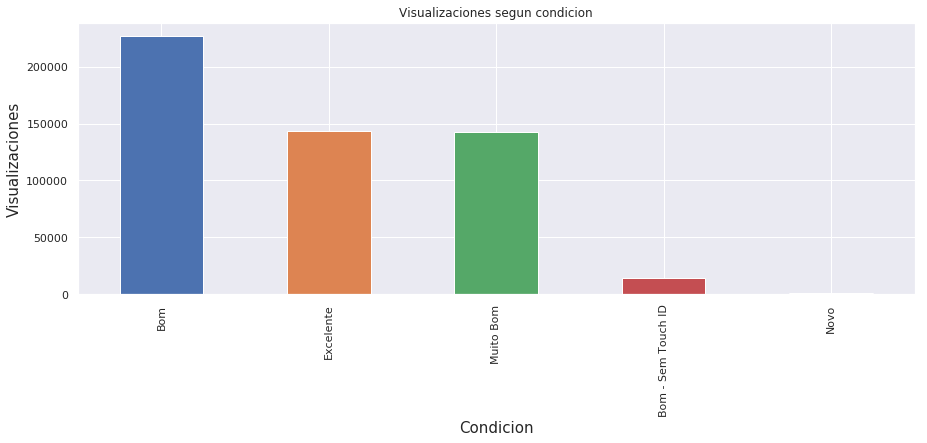

In [29]:
events.loc[events['event']=='viewed product']['condition'].value_counts().head(9).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun condicion')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Condicion", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Condicion

# Compras/Visualizaciones segun Modelo

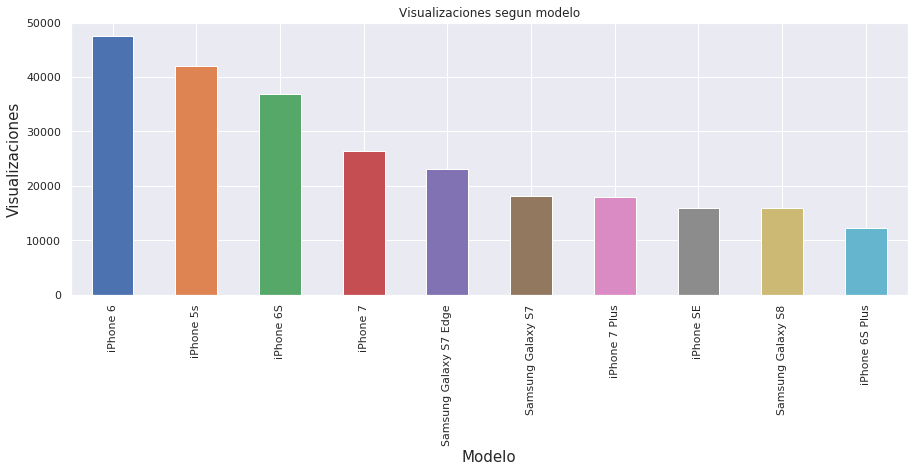

In [176]:
# Conversions segun Modelo
events.loc[events['event']=='viewed product'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun modelo')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

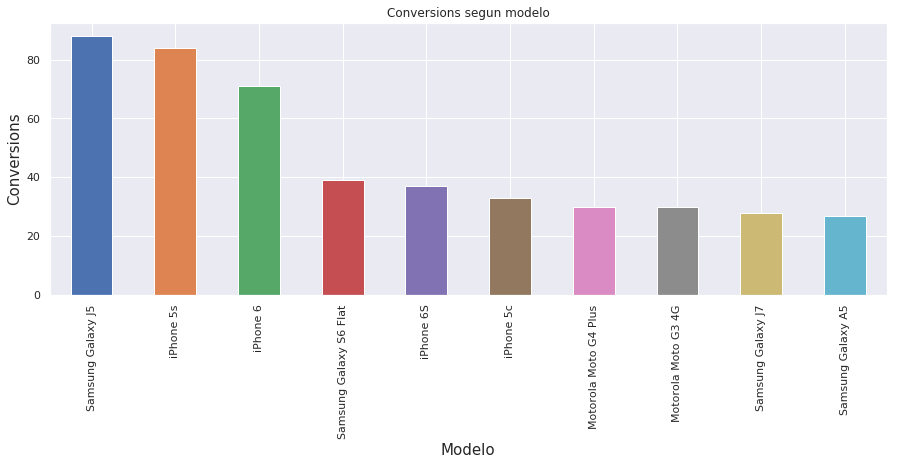

In [5]:
# Conversions segun Modelo
events.loc[events['event']=='conversion'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun modelo')
plt.ylabel("Conversions", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Modelo

#  Compras/Visualizaciones segun Marca

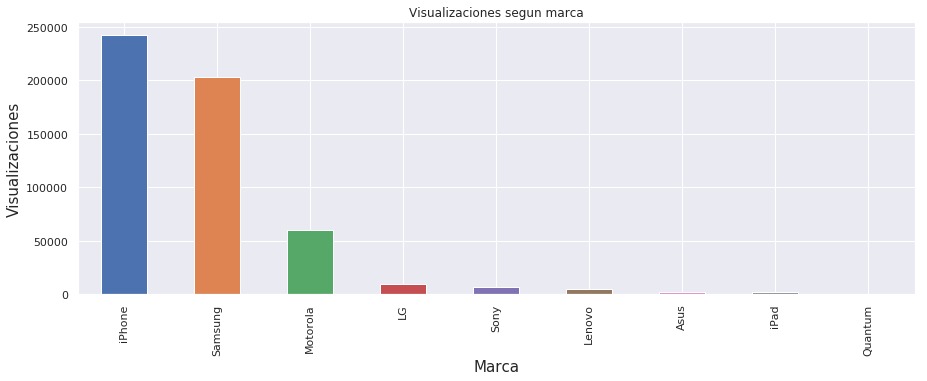

In [172]:
#Grafico Numero Eventos segun tupla Evento/Marca
events.loc[events['event']=='viewed product'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visualizaciones segun marca')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Marca", size=15)
plt.show()

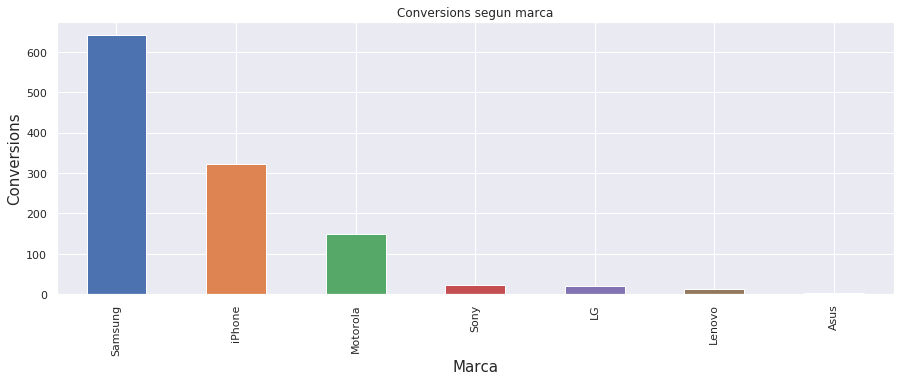

In [171]:
events.loc[events['event']=='conversion'].groupby('marca')['timestamp'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun marca')
plt.ylabel("Conversions", size=15)
plt.xlabel("Marca", size=15)
plt.show()

### Observaciones sobre Compras/Visualizaciones segun Marca

# Analisis segun region

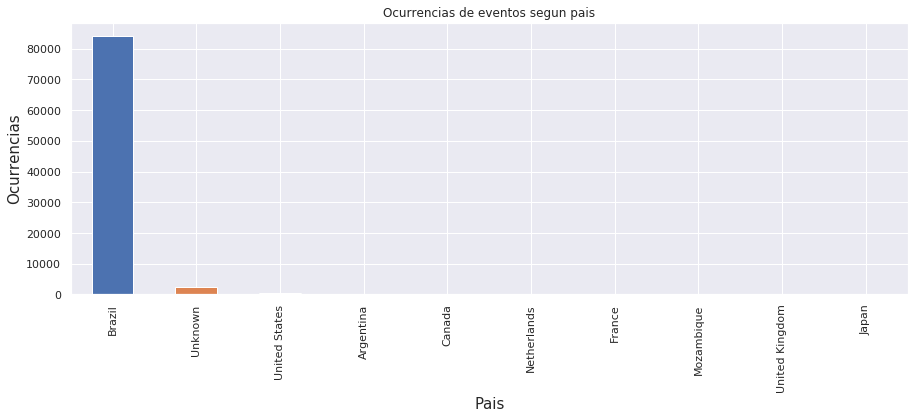

In [180]:
#Grafico eventos segun region
events.groupby('country')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Ocurrencias de eventos segun pais')
plt.ylabel("Ocurrencias", size=15)
plt.xlabel("Pais", size=15)
plt.show()

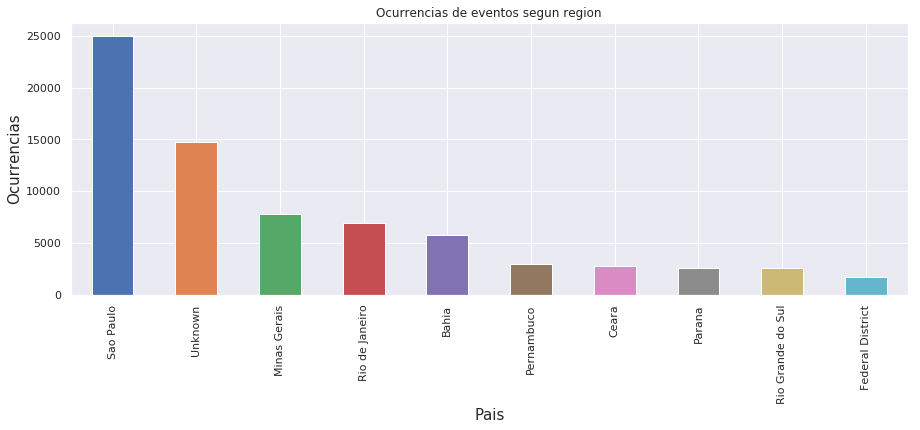

In [182]:
#Grafico eventos segun region
events.groupby('region')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Ocurrencias de eventos segun region')
plt.ylabel("Ocurrencias", size=15)
plt.xlabel("Pais", size=15)
plt.show()

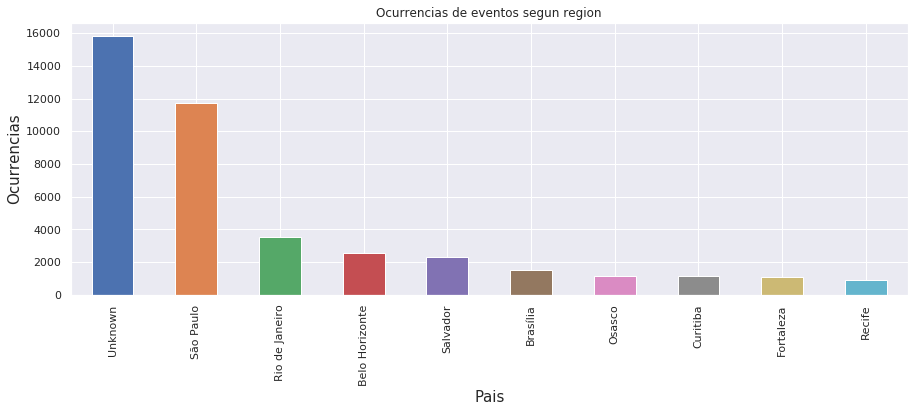

In [183]:
#Grafico eventos segun ciudad
events.groupby('city')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Ocurrencias de eventos segun region')
plt.ylabel("Ocurrencias", size=15)
plt.xlabel("Pais", size=15)
plt.show()

### Comentarios Analisis segun region

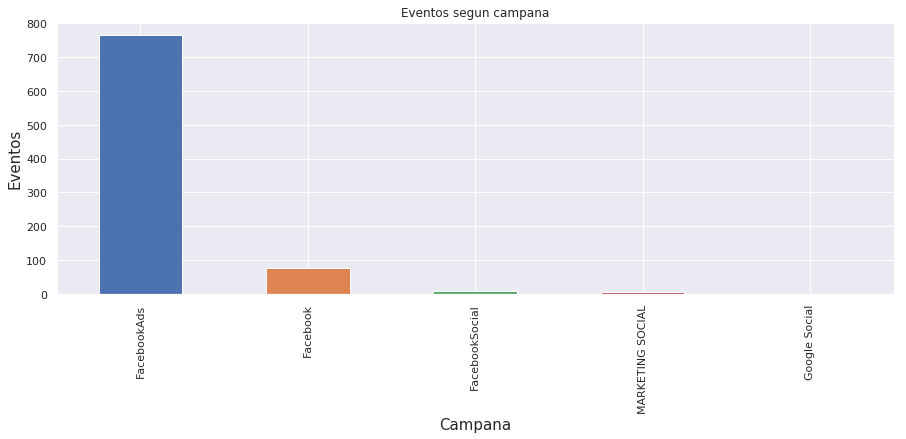

In [138]:
#grafico eventos segun campaña
events.loc[events['event']=='ad campaign hit'].groupby('campaign_source').count().head(5)['timestamp'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun campana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Campana", size=15)
plt.show()

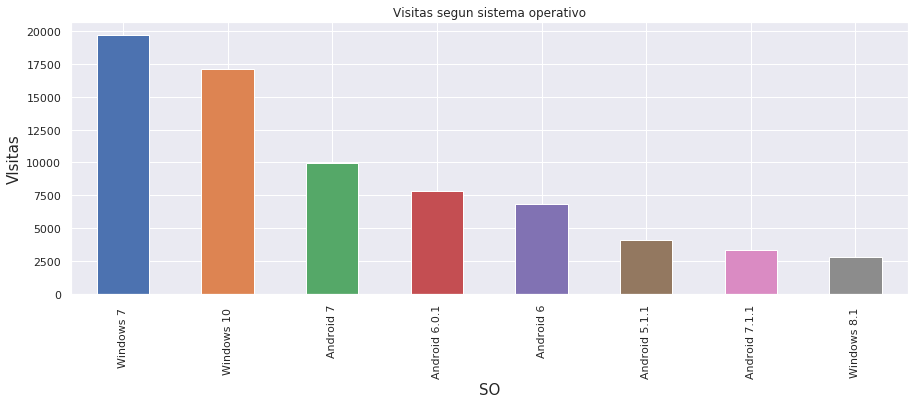

In [21]:
#Grafico visitas segun sistema operativo
events.loc[~events['operating_system_version'].str.contains('nan',case=False,regex=False)]['operating_system_version'].value_counts().head(8).sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun sistema operativo')
plt.ylabel("Visitas", size=15)
plt.xlabel("SO", size=15)
plt.show()

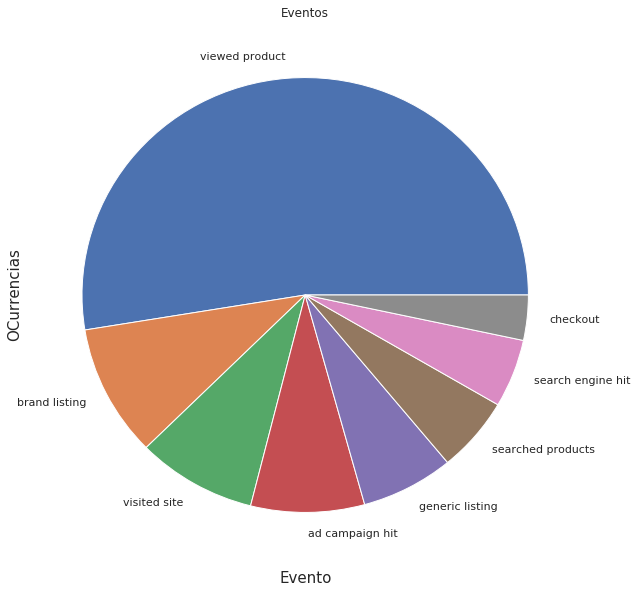

In [11]:
#Grafico segun evento
events.groupby('event')['timestamp'].count().sort_values(ascending=False).head(8).plot(kind='pie',figsize=(10,10))
plt.title('Eventos')
plt.ylabel("OCurrencias", size=15)
plt.xlabel("Evento", size=15)
plt.show()

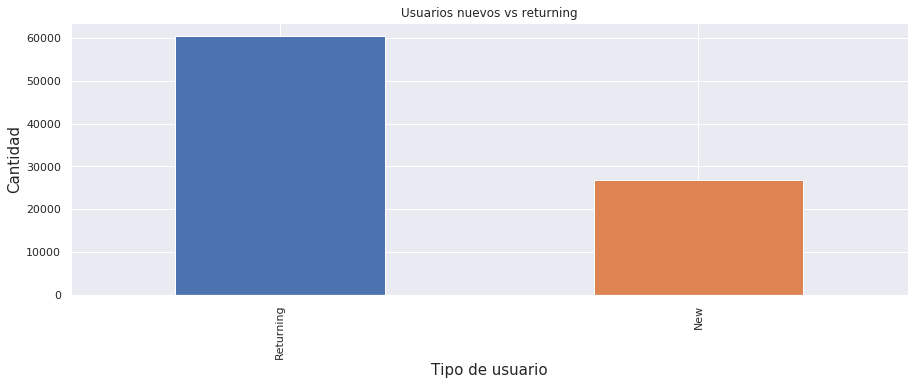

In [181]:
#Grafico new vs returnimg
events['new_vs_returning'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Usuarios nuevos vs returning')
plt.ylabel("Cantidad", size=15)
plt.xlabel("Tipo de usuario", size=15)
plt.show()

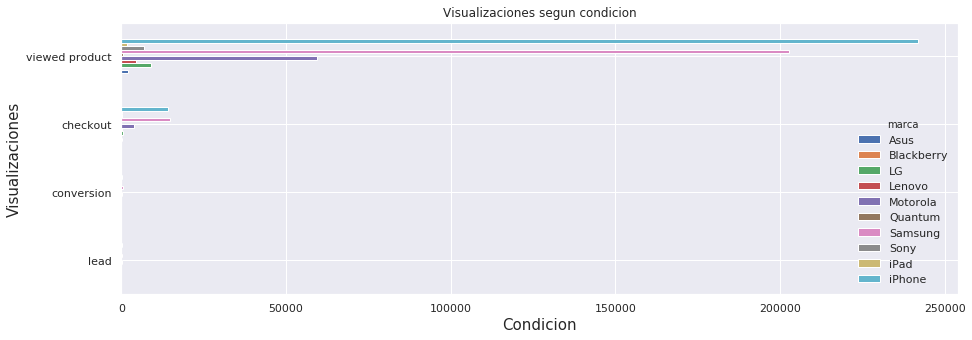

In [130]:
#PRUEBA GRAFICO DE BARRAS MULTIPLES

#events.loc[events['event']=='conversion'][['storage','color']].count()
events.groupby(['event','marca'])['timestamp'].count().sort_values().unstack().plot(kind='barh',figsize=(15,5))
plt.title('Visualizaciones segun condicion')
plt.ylabel("Visualizaciones", size=15)
plt.xlabel("Condicion", size=15)
plt.show()

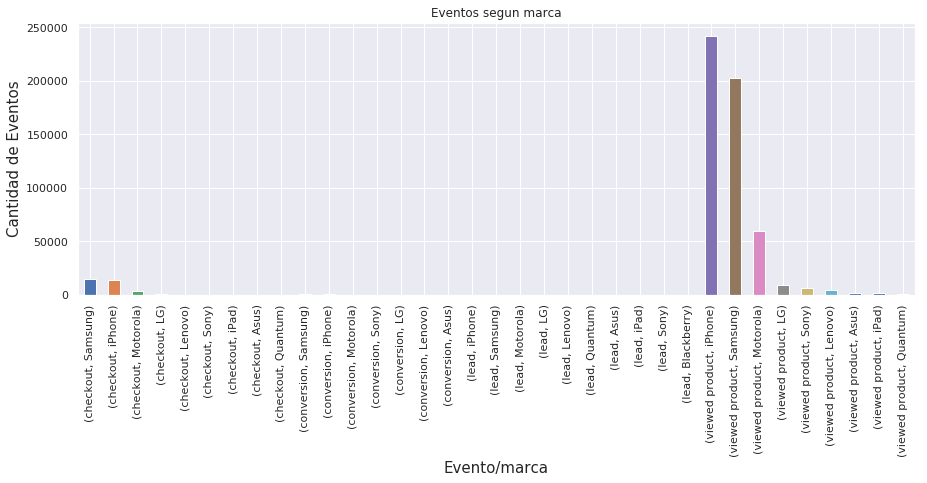

In [24]:
#Grafico Numero Eventos segun tupla Evento/Marca
events.loc[events['marca'].notnull()].groupby('event')['marca'].value_counts().plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun marca')
plt.ylabel("Cantidad de Eventos", size=15)
plt.xlabel("Evento/marca", size=15)
plt.show()

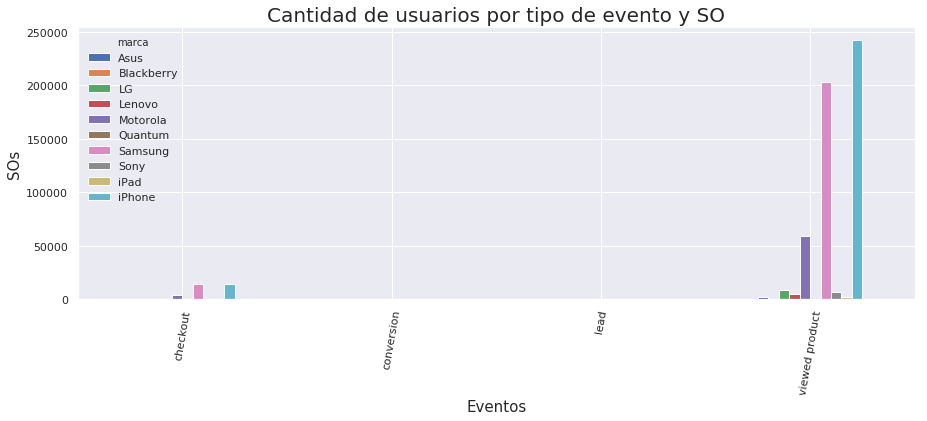

In [94]:
#PRUEBA GRAFICO DE BARRAS MULTIPLES
events.groupby(['event','marca']).count().unstack()['person'].plot(kind='bar',rot=80, figsize=(15,5))
plt.title("Cantidad de usuarios por tipo de evento y SO", size=20)
plt.xlabel("Eventos",size=15)
plt.ylabel("SOs",size=15)
plt.show()